# EDA

## 1. Numerical Data

### Income analysis "Ingresos (miles de pesos)"

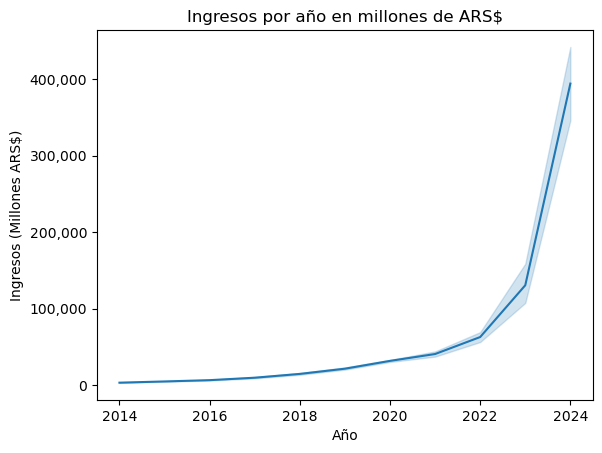

In [ ]:
#Order dataset by year and quarter ("Periodo")
df.sort_values(by=['Periodo'], inplace=True)

income_plot = sns.lineplot(data=df, x=df['Año'], y=df['Ingresos (miles de pesos)']/1000)
plt.title('Ingresos por año en millones de ARS$')
income_plot.set(xlabel='Año', ylabel='Ingresos (Millones ARS$)')
income_plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()


#### The income have a growth pattern, from 2021 the growth have an expotential increment given by the volatility of the currency in Argentina. 